## Training FCN_8_resnet50With CelebA Dataset
### By 10 epochs, 140steps, batch size=20.

In [1]:
import os
import sys
import datetime

import PIL.Image as Image
import matplotlib.pyplot as plt
%matplotlib inline

ROOT_DIR = os.path.join(os.getcwd(), '../..')
sys.path.append(ROOT_DIR)

In [2]:
from keras_segmentation.models.fcn import fcn_8_vgg as M

Using TensorFlow backend.
/home/jho/anaconda3/envs/tf12-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jho/anaconda3/envs/tf12-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jho/anaconda3/envs/tf12-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jho/anaconda3/

In [3]:
now = datetime.datetime.now()
NOW = "{:%Y%m%dT%H%M}".format(now)

In [4]:
OUT_DIR = os.path.join(ROOT_DIR, 'out')
CHECKPOINTS_DIR = os.path.join(OUT_DIR, 'checkpoints')
PREDICTIONS_DIR = os.path.join(OUT_DIR, 'predictions')
LOGS_DIR = os.path.join(OUT_DIR, 'logs')

DATASET_DIR = os.path.join(ROOT_DIR, 'dataset/celeba_')

TRAIN_IMAGES = os.path.join(DATASET_DIR, 'train/original')
TRAIN_ANNOTATIONS = os.path.join(DATASET_DIR, 'train/mask')

VAL_IMAGES = os.path.join(DATASET_DIR, 'val/original')
VAL_ANNOTATIONS = os.path.join(DATASET_DIR, 'val/mask')

TEST_IMAGES = os.path.join(DATASET_DIR, 'test/original')
TEST_ANNOTATIONS = os.path.join(DATASET_DIR, 'test/mask')

In [5]:
# Configurations

MODEL_NAME = 'fcn_8_vgg16'
N_CLASSES = 3

I_HEIGHT = 256
I_WIDTH = 256

# I_HEIGHT = 218
# I_WIDTH = 178

EPOCHS = 100

BATCH_SIZE=28
STEPS_PER_EPOCH= 100

VAL_STEPS = 355
VAL_BATCH_SIZE=1

In [6]:
tag = 'celeba/{name}/ep{epochs}/st{steps}/ba{batch}'.format(
    name=MODEL_NAME,
    epochs=EPOCHS,
    steps=STEPS_PER_EPOCH,
    batch=BATCH_SIZE
)

PLOTS_DIR = os.path.join(OUT_DIR, 'plots')
if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)
PLOT_PATH = os.path.join(PLOTS_DIR, 'model_{}.svg'.format(MODEL_NAME))

CHECKPOINTS_DIR = os.path.join(CHECKPOINTS_DIR, tag)
PREDICTIONS_DIR = os.path.join(PREDICTIONS_DIR, tag)
LOGS_DIR = os.path.join(LOGS_DIR, tag)
if not os.path.exists(CHECKPOINTS_DIR):
    os.makedirs(CHECKPOINTS_DIR)
if not os.path.exists(PREDICTIONS_DIR):
    os.makedirs(PREDICTIONS_DIR)
if not os.path.exists(LOGS_DIR):
    os.makedirs(LOGS_DIR)
    
dir_configuration = """
NOW = {now}
out_dir : {out_dir}
checkpoints_dir : {checkpoints_dir}
logs_dir : {logs_dir}
predictions_dir : {predictions_dir}

dataset_dir : {dataset_dir}
train_images : {train_images}
train_annotations : {train_annotations}
val_images : {val_images}
val_annotations : {val_annotations}
""".format(
    now=NOW,
    out_dir=OUT_DIR,
    checkpoints_dir=CHECKPOINTS_DIR,
    logs_dir=LOGS_DIR,
    predictions_dir=PREDICTIONS_DIR,

    dataset_dir=DATASET_DIR,
    train_images=TRAIN_IMAGES,
    train_annotations=TRAIN_ANNOTATIONS,
    val_images=VAL_IMAGES,
    val_annotations=VAL_ANNOTATIONS,
)
print(dir_configuration)


NOW = 20200422T0353
out_dir : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../out
checkpoints_dir : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../out/checkpoints/celeba/fcn_8_vgg16/ep100/st100/ba28
logs_dir : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../out/logs/celeba/fcn_8_vgg16/ep100/st100/ba28
predictions_dir : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../out/predictions/celeba/fcn_8_vgg16/ep100/st100/ba28

dataset_dir : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../dataset/celeba_
train_images : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../dataset/celeba_/train/original
train_annotations : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../dataset/celeba_/train/mask
val_images : /home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../dataset/celeba_/val/original
val_annotations : /home/jho/projects/image-segmentation-ker

In [7]:
# Define model
model = M(n_classes=N_CLASSES, input_height=I_HEIGHT, input_width=I_WIDTH)
model.summary()

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


plot_model(model, to_file=PLOT_PATH)
# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 256, 256, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 128, 128, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [8]:
# Train
checkpoints_path = os.path.join(CHECKPOINTS_DIR, NOW)
logs_path = os.path.join(LOGS_DIR, NOW)

model.train(
    train_images = TRAIN_IMAGES,
    train_annotations = TRAIN_ANNOTATIONS,
    checkpoints_path=checkpoints_path,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    log_dir=logs_path,
    validate=True,
    val_images=VAL_IMAGES,
    val_annotations = VAL_ANNOTATIONS,
    val_steps=VAL_STEPS,
    batch_size=BATCH_SIZE,
    val_batch_size=VAL_BATCH_SIZE,
    save_best_only=True)

  0%|          | 0/2800 [00:00<?, ?it/s]

Verifying training dataset


100%|██████████| 355/355 [00:00<00:00, 1905.50it/s]


Dataset verified! 
Verifying validation dataset
Dataset verified! 
Start training with validation...
Epoch 1/100
100/100 [==============================] - 92s 917ms/step - loss: 2.2844 - acc: 0.5308 - val_loss: 0.7223 - val_acc: 0.6740
Epoch 2/100
100/100 [==============================] - 86s 855ms/step - loss: 0.6387 - acc: 0.7307 - val_loss: 0.7790 - val_acc: 0.6547
Epoch 3/100
100/100 [==============================] - 85s 855ms/step - loss: 0.2834 - acc: 0.8899 - val_loss: 0.2779 - val_acc: 0.8991
Epoch 6/100
100/100 [==============================] - 86s 855ms/step - loss: 0.2475 - acc: 0.9041 - val_loss: 0.3053 - val_acc: 0.8959
Epoch 7/100
100/100 [==============================] - 86s 855ms/step - loss: 0.2204 - acc: 0.9151 - val_loss: 0.2544 - val_acc: 0.9079
Epoch 8/100
100/100 [==============================] - 86s 855ms/step - loss: 0.2553 - acc: 0.9025 - val_loss: 0.2517 - val_acc: 0.9070
Epoch 9/100
100/100 [==============================] - 86s 856ms/step - loss: 0.192

OSError: Unable to create file (unable to open file: name = '/home/jho/projects/image=segmentation-keras/out/checkpoints/celeba/best/fcn_8_vgg16.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

In [10]:
model.save_weights('/home/jho/projects/image-segmentation-keras/out/checkpoints/celeba/best/fcn_8_vgg16.h5')

In [ ]:
model.summary()

In [11]:
# evaluating the model
evaluation = model.evaluate_segmentation(inp_images_dir=VAL_IMAGES, annotations_dir=VAL_ANNOTATIONS)
print(evaluation)


355it [00:17, 19.78it/s]

{'frequency_weighted_IU': 0.9157198041957206, 'mean_IU': 0.8868239142018913, 'class_wise_IU(IoU)': array([0.94781131, 0.90648224, 0.80617819])}


In [12]:
import random
test_list = os.listdir(TEST_IMAGES)
rand_test = random.choice(test_list)[:-4]
print(rand_test)

sample_test_image = os.path.join(TEST_IMAGES, rand_test + '.jpg')
sample_test_annotaion = os.path.join(TEST_ANNOTATIONS, rand_test + '.bmp')

best_val_loss_model = checkpoints_path + "-best_val_loss.h5"
best_val_acc_model = checkpoints_path + "-best_val_acc.h5"

best_val_loss_out_fname = os.path.join(PREDICTIONS_DIR, 'out_{}_{}_val_loss_{}.png'.format(MODEL_NAME, rand_test, NOW))
best_val_acc_out_fname = os.path.join(PREDICTIONS_DIR, 'out_{}_{}_val_acc_{}.png'.format(MODEL_NAME, rand_test, NOW))

print(sample_test_image)
print(best_val_loss_model)

121002
/home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../dataset/celeba_/test/original/121002.jpg
/home/jho/projects/image-segmentation-keras/train_faces/vgg16/../../out/checkpoints/celeba/fcn_8_vgg16/ep100/st100/ba28/20200422T0353-best_val_loss.h5


In [13]:
best_val_loss_out = model.predict_segmentation(
    inp=sample_test_image,
    checkpoints_path=best_val_loss_model,
    out_fname=best_val_loss_out_fname)

best_val_acc_out = model.predict_segmentation(
    inp=sample_test_image,
    checkpoints_path=best_val_acc_model,
    out_fname=best_val_acc_out_fname)

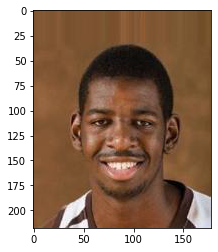

In [14]:
plt.imshow(Image.open(sample_test_image))

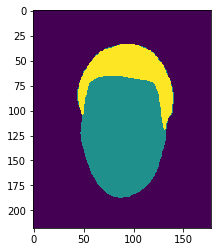

In [15]:
plt.imshow(Image.open(sample_test_annotaion))

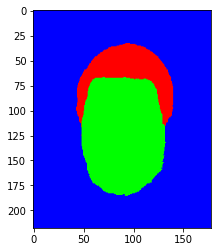

In [16]:
plt.imshow(Image.open(best_val_loss_out_fname))

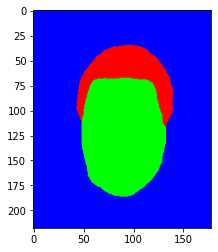

In [17]:
plt.imshow(Image.open(best_val_acc_out_fname))